##ID:X
##Name:Gilad X

##Introduction
###Benchmarking

The purpouse of this section is measuring the actual running time of a function. Here we test a creation of list twice, one time calling the function, and the other time by the code snippet:


In [1]:
import timeit #import the time measure package

def make_list():
    return [_ for _ in range(10)]

t1 = timeit.repeat(make_list, repeat=10)
t2 = timeit.repeat("[_ for _ in range(10)]", repeat=10)


here we see the running times

In [2]:
print(t1)
print(t2)

[4.151055065000037, 1.761977485000898, 2.8224876149997726, 1.597495906000404, 1.5165246090000437, 1.457784022000851, 1.4611828899996908, 1.5645174009987386, 1.4770295500002248, 1.6951702679998562]
[2.224569554999107, 1.1009683210013463, 1.0332256860001507, 1.033808221000072, 1.0337743029995181, 1.0721369749990117, 1.0300724759999866, 1.0327528050002002, 1.0386430419985118, 3.077888281999549]


<AxesSubplot:>

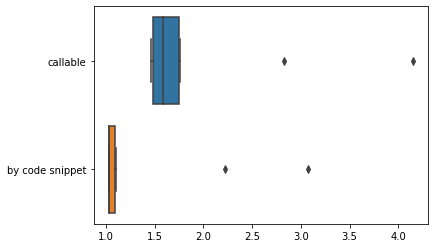

In [3]:
import seaborn as sns # package for visualisation
sns.boxplot(x=t1 + t2, y=['callable'] * len(t1) + ['by code snippet'] * len(t2))
#x axis is a joined list of the running times, y - their lables, a lable for each observation


Now let's check performance as a dependence on $n$. Here, we use predefined size of set $n$ using on-the-fly python function, which is specific for our current parameter.

In [4]:
import array
def foo_array(n):
    return array.array("i", [0]*n) #here 'i' stands for positive integer type of array
def foo_list(n):
    return [0]*n

n = pow(10,2)
rep = 25
t1 = timeit.repeat(lambda: foo_array(n),  repeat=rep,number=10)
t2 = timeit.repeat(lambda: foo_list(n),  repeat=rep,number=10)

In [5]:
print(t1)
print(t2)

[0.00012030099969706498, 7.928199920570478e-05, 7.867599924793467e-05, 8.5924000813975e-05, 8.66230002429802e-05, 9.374000001116656e-05, 9.412099825567566e-05, 9.431899889023043e-05, 9.46769996517105e-05, 9.303700062446296e-05, 0.00011042299956898205, 9.384099939779844e-05, 9.336100083601195e-05, 0.00010586600001261104, 9.387099999003112e-05, 9.462700108997524e-05, 9.354699977848213e-05, 9.416700049769133e-05, 9.921600030793343e-05, 9.315399984188844e-05, 0.00010660299994924571, 9.393099935550708e-05, 9.364600009575952e-05, 9.954400047718082e-05, 9.425099960935768e-05]
[3.81499994546175e-05, 1.858200084825512e-05, 1.7946998923434876e-05, 1.8426999304210767e-05, 2.6011999580077827e-05, 1.8466000256012194e-05, 1.847000021371059e-05, 1.838899879658129e-05, 1.8497999917599373e-05, 1.8521999663789757e-05, 1.8397999156150036e-05, 2.605500048957765e-05, 1.8470998838893138e-05, 1.8504999388824217e-05, 1.8374001228949055e-05, 1.8495000404072925e-05, 1.8210999769507907e-05, 0.0004677860015362967

<AxesSubplot:>

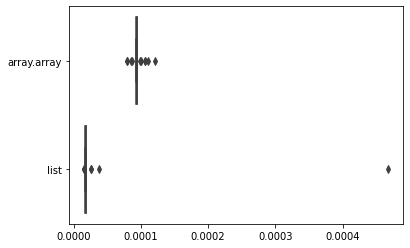

In [6]:
sns.boxplot(x=t1 + t2, y=['array.array'] * len(t1) + ['list'] * len(t2))


and now summarizing for different sizes

In [123]:
t1 = []
t2 = []
rep = 5
degrees = [0,1,2,3,4]
for degree in degrees:
  n = pow(2,degree)
  t1 = t1 + timeit.repeat(lambda: foo_array(n),  repeat=rep,number=10)
  t2 = t2 + timeit.repeat(lambda: foo_list(n),  repeat=rep,number=10)


NameError: ignored

In [8]:
import numpy as np

def flat_to_array(lst1):
  return np.asarray([item for sublist in lst1 for item in sublist])

sizes = flat_to_array([[pow(2,i)]*rep for i in degrees]*2)
experiments = flat_to_array([['array.array'] * len(degrees) * rep + ['list'] * len(degrees) * rep])
vals = np.asarray(t1 + t2 )



In [9]:
vals

array([9.35520002e-05, 2.01900002e-05, 1.94299992e-05, 1.76499998e-05,
       1.82019994e-05, 2.87480016e-05, 1.98210000e-05, 1.99450005e-05,
       1.94240001e-05, 1.94580007e-05, 2.82059991e-05, 2.34510007e-05,
       2.19449994e-05, 2.15569999e-05, 2.16169992e-05, 2.87490002e-05,
       2.22800008e-05, 2.56439998e-05, 2.59760000e-05, 2.44330004e-05,
       4.18720010e-05, 1.06736999e-04, 4.86760000e-05, 3.77169999e-05,
       3.01279997e-05, 3.54730000e-05, 6.49630001e-05, 1.33619997e-05,
       1.25120005e-05, 2.62699996e-05, 1.74640008e-05, 1.53109995e-05,
       1.44189999e-05, 1.45750000e-05, 1.44960013e-05, 1.40890006e-05,
       1.38629985e-05, 1.44360001e-05, 1.32740006e-05, 1.25820006e-05,
       2.96790004e-05, 2.22449999e-05, 1.52920002e-05, 1.66300015e-05,
       1.65940000e-05, 1.88380000e-05, 1.56970000e-05, 1.61749995e-05,
       1.69989999e-05, 1.53940000e-05])

<AxesSubplot:title={'center':'Runtime of structure initiation'}, xlabel='n', ylabel='time, seconds'>

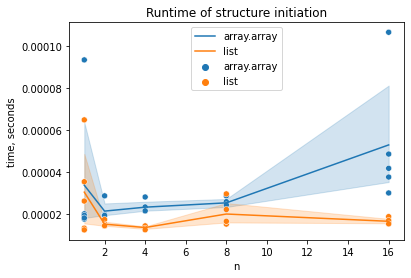

In [10]:
lineplt = sns.lineplot(x=sizes, y=vals, hue=experiments)
lineplt.set(title = 'Runtime of structure initiation',xlabel='n', ylabel='time, seconds')

sns.scatterplot(x=sizes, y=vals, hue=experiments)




#Q1.
 Your task is to sort subarrays sepparately, and then effectively merge them

First, we generate a list of grades, taken randomly from normal distribution with the mean=80 and sd=20.
We throw illegal values and in this way the length of arrays slightly differs
The plot illustrates the actual distribution of the grades

In [11]:
lst1 = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=100)) if x < 101 and x>= 0]

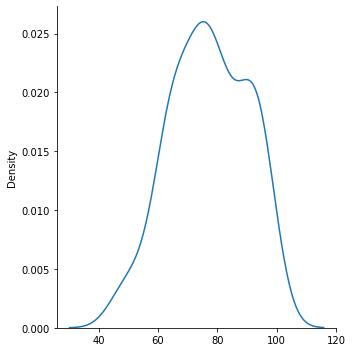

In [12]:
sns.displot(lst1, kind="kde")

In [13]:
print(len(lst1))

92


##a.
Write a naive algorithm of your choice for sorting a list in $O(n^2)$

In [14]:
lst11=[]
print(len(lst11))

0


In [15]:
def find_min_in_list(list):
  if len(list)==0:
    return -1
  if len(list)==1:
    return list[0]
  else:
    min = list[0]
    min_idx = 0
    for i in range(len(list)):
      if list[i]<=min:
        min=list[i]
        min_idx = i

    return min_idx    

  

In [16]:
def naive_sort(lst1):
  length=len(lst1)

  for i in range(length-1):
    minidx= find_min_in_list(lst1[i:])+i
    lst1[i],lst1[minidx] = lst1[minidx],lst1[i]  
    #print(lst1)






In [17]:
print(len(lst1))

92


In [18]:
print(lst1)
lst17=lst1.copy()
naive_sort(lst17)
print(lst17)

[82, 94, 98, 65, 91, 74, 82, 63, 86, 96, 59, 91, 77, 64, 76, 87, 83, 65, 74, 78, 71, 49, 89, 92, 76, 93, 90, 61, 52, 91, 72, 87, 83, 70, 70, 76, 72, 76, 98, 84, 76, 63, 65, 95, 80, 62, 82, 69, 95, 92, 78, 65, 56, 91, 77, 64, 73, 69, 95, 98, 76, 94, 79, 60, 81, 72, 63, 65, 79, 87, 72, 81, 76, 49, 100, 85, 55, 93, 68, 46, 71, 62, 67, 77, 74, 66, 92, 94, 89, 80, 65, 95]
[46, 49, 49, 52, 55, 56, 59, 60, 61, 62, 62, 63, 63, 63, 64, 64, 65, 65, 65, 65, 65, 65, 66, 67, 68, 69, 69, 70, 70, 71, 71, 72, 72, 72, 72, 73, 74, 74, 74, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 82, 83, 83, 84, 85, 86, 87, 87, 87, 89, 89, 90, 91, 91, 91, 91, 92, 92, 92, 93, 93, 94, 94, 94, 95, 95, 95, 95, 96, 98, 98, 98, 100]


Drive code explanation:
In Python sort on list is performid inplace, so we want to copy the list before performing the naive sort, so we might compare it with the built-in sort function

In [19]:
#Drive code
sorted = lst1.copy()
lst2 = lst1.copy()
naive_sort(sorted)

In [20]:
lst2.sort()
sorted == lst2 

True

In [21]:
sorted == lst1 

False

##b.
Implement a [count sort](https://en.wikipedia.org/wiki/Counting_sort) algoritm for sort in a following way: you know your numbers are integers that vary from 0 to 100. Define a list called **counts** such that each index will represent the corresponding number in the range. Such that **counts[0]** will tell us how many zeroes are at the array and **counts[60]** will represent the number of times the number 60 appears at the list. The sorted list is represented by reporting the number of times 0 appears, the number of times 1 appears, and so on

In [22]:
def count_sort(lst1):
  #applying given instructions: list named count to count appearnces of numbers
  #we initialize alist of size 101
  counts = [0]*101
  sorted = []
  #loop to count the elements
  for i in range (len(lst1)):
    #for each element increase count by 1 in counts
    counts[lst1[i]] = counts[lst1[i]]+1
  #now we dual loop to append each number for its ocurences    
  for i in range(len(counts)):
    for j in range(counts[i]):
      sorted.append(i)
  #now we loop to copy all elements to lst1    
  for i in range(len(lst1)):
    lst1[i] = sorted[i]
    #debug printout
  #print(lst1)
  

In [23]:
#Drive code
sorted = lst1.copy()
lst2 = lst1.copy()
count_sort(sorted)

In [24]:
lst2.sort()
sorted == lst2 

True

In [25]:
sorted == lst1 

False

##c.
Describe and implement the algorithm of you choice for efficiently sorting the list (better than the naive)

In [26]:

#i will implement QuickSort 
#partitioner func to find pivot index and move other elements to greater smaller
# subarray 
# Sort func to recursively split array around pivot untill len=1

#returns partition index(pivIndx) and seperate to left side< pivot val
# and right side > pivot val
def partition(lst,l,r):
  #i to remember last switch place
  i = l-1
  len = l-r
  pivot = lst[r]
  #loop to search moving j++ till end
  for j in range(l,r):

    if (lst[j] < pivot) :
      #we found an element outside its place so we swap and move i
      #we swap to i+1 because if no switches made - it points to -1
      lst[j] , lst[i+1] = lst[i+1] , lst[j]
      i += 1
  #now we finished swapping , need to place pivot, also -set to i+1
  lst[r] , lst[i+1] = lst[i+1] , lst[r]
  return i+1    








def quicksrt(lst,l,r):
  #if length of given lst is >1 then we need to sort . else sorted!
  if (r-l>0):
   pivIndx = partition(lst,l,r)
   quicksrt(lst,l,pivIndx-1)
   quicksrt(lst,pivIndx+1,r)




def mybest_sort(lst1):
  listLenght = len(lst1)
  l = 0
  r = listLenght -1
  quicksrt(lst1,l,r)
  


In [27]:
#Drive code
sorted = lst1.copy()
lst2 = lst1.copy()
mybest_sort(sorted)

In [28]:
lst2.sort()
sorted == lst2 

True

In [29]:
sorted == lst1 

False

##d. 
check the performances for different sizes of the list

In [30]:
lst_sizes=[pow(10,x) for x in range(1,5)]
print(lst_sizes)

[10, 100, 1000, 10000]


create a list of (approximately) a corresponding size and sort it. you may not achieve the exact size as the actual number of elements varies
a new list should be randomized at each run. plot your results for all three algorithms and **make conclusions** .  please use the actual, and not the approximated size while plotting

In [31]:
t1 = []
t2 = []
t3 = []
rep = 5

for size in lst_sizes:
  n = size
  for i in range(1):
      lsttotest = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=n)) if x < 101 and x>= 0]
      lst3=lsttotest.copy()
      lst4=lsttotest.copy()
      lst5=lsttotest.copy()
      t1.append(timeit.timeit(lambda: naive_sort(lst3),number=10))
      t2.append(timeit.timeit(lambda: count_sort(lst4),number=10))
      t3.append(timeit.timeit(lambda: mybest_sort(lst5),number=10))


In [32]:
print(t1)

[0.00027053399935539346, 0.008428294999248465, 0.6863638430004357, 39.992597186999774]


In [85]:
import numpy as np

def flat_to_array(lst1):
  return np.asarray([item for sublist in lst1 for item in sublist])

sizes = flat_to_array([[pow(10,i)]*1 for i in range(1,5)]*3)
experiments = flat_to_array([['naive'] * 4 * 1 + ['count'] * 4 * 1 + ['mysort'] * 4 * 1])
vals = np.asarray(t1 + t2 + t3 )


NameError: ignored

In [34]:
print(sizes)

[   10   100  1000 10000    10   100  1000 10000    10   100  1000 10000]


<AxesSubplot:title={'center':'Runtime of structure initiation'}, xlabel='n', ylabel='time, seconds'>

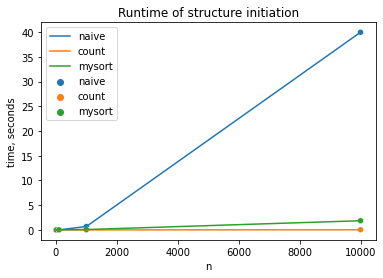

In [35]:
lineplt = sns.lineplot(x=sizes, y=vals, hue=experiments)
lineplt.set(title = 'sort runtime comparison',xlabel='n', ylabel='time, seconds')

sns.scatterplot(x=sizes, y=vals, hue=experiments)


In [36]:
llst3 = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=100)) if x < 101 and x>= 0]

###your conclusions:
my conclusion would be - the best performing sort will be the one with the least calls to outer functions or sub functions , as we seen in part 1, the time for all these inside calls is growing rapidly for larger inputs.

CONCLUSION - each sorting algo , or each algo should be "fitted" to its purpose, if we want to sort integers in range of 1-99 well use count sort. but for different inputs to sort , and larger inputs , we should use quicksort, and implement it with the "least callbacks , and inner calls for functions" strategy.

##e.
create a list of lists, such that there are 10 lists of length up to 100. write a naive merge function that will take the maximal value, compairing iteratively  from all of the first elements. you **can't** use the built-in **max()** function. define your own, if you wish. here, $k$ represents the number of lists you have to merge

In [37]:
#helper function
def give_presorted_sublist(mysize=100):
  lst1 = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=mysize)) if x < 101 and x>= 0]
  lst1.sort()
  return lst1




In [38]:
print([x for x in give_presorted_sublist()])

[53, 56, 57, 58, 58, 59, 60, 61, 62, 62, 62, 62, 62, 63, 63, 64, 64, 66, 66, 67, 68, 69, 70, 72, 72, 73, 73, 74, 75, 76, 76, 77, 77, 77, 77, 78, 78, 78, 79, 79, 79, 79, 79, 80, 80, 81, 81, 81, 81, 81, 82, 82, 83, 83, 83, 83, 84, 84, 84, 85, 86, 87, 88, 88, 88, 88, 88, 88, 89, 90, 90, 90, 90, 90, 91, 91, 92, 92, 94, 94, 94, 96, 97, 98, 98, 98, 99]


In [39]:
#helper function
def prep_lst_of_lsts(n=100,k=10):
  return [give_presorted_sublist(n) for i in range(k)]




In [40]:
prep_lst_of_lsts(10,3)

[[55, 58, 70, 77, 77, 78, 80, 82, 84, 97],
 [63, 65, 68, 74, 75, 82, 85, 94, 98],
 [55, 62, 63, 68, 71, 75, 81, 85]]

Your code goes here:

In [41]:
# i will loop throught all the lstoflsts[0][k]
#find the smallest , append to my solution and continue untill 
# no more values.


def naive_merge(lst_of_lsts):
  k = len(lst_of_lsts)
  sortedlst = []
  changemade = 1
  while (changemade != 0):
    #print(lst_of_lsts)
    changemade = 0
    smallest = 1000;
    smallIndx = 0
    for i in range(k):
       
       if (len(lst_of_lsts[i])!=0):
         if (lst_of_lsts[i][0]<=smallest):
           smallest = lst_of_lsts[i][0]
           smallIndx = i
           changemade = 1
    if changemade == 1:       
      sortedlst.append(lst_of_lsts[smallIndx][0])
      lst_of_lsts[smallIndx] = lst_of_lsts[smallIndx][1:]       
  return sortedlst


In [42]:
naive_merge([[15,42],[99,100],[45,57,82],[50,70,90]]) #[15,42,45,50,57,70,82,90,99,100]

[15, 42, 45, 50, 57, 70, 82, 90, 99, 100]

## f. 
write a merge algorithm by [devide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm) approach: merge each two sublist, recursively.



In [43]:
def merge_two(lst1,lst2):
  merged = []
 # print(merged)

  if (lst1 == None and lst2 == None):
    return merged
  else:
    if (lst1 == None):
      return merged+(lst2)
    else:
      if (lst2 == None):
        return merged+(lst1)
      else:
        if (len(lst1)==0):
          return merged+(lst2)
        else:
          if (len(lst2)==0):
            return merged+(lst1)
          else:  
           # print("were else")
           # print(merged)
            if (lst1[0]==lst2[0]):
              merged.append(lst1[0])
              merged.append(lst2[0])
              return merged+(merge_two(lst1[1:],lst2[1:]))
            else:
              if (lst1[0]<lst2[0]):
                merged.append(lst1[0])
                return merged + (merge_two(lst1[1:],lst2))
              else:
                merged.append(lst2[0])
                return merged +(merge_two(lst1,lst2[1:]))
   
  

  




def dnc_merge(lst_of_lsts):
  k = len(lst_of_lsts)
  if (k<=1):
    return lst_of_lsts[0]
  else: #we have more then 2 lists
    lst_of_lsts.append(merge_two(lst_of_lsts.pop(),lst_of_lsts.pop()))
  return dnc_merge(lst_of_lsts)  
       

In [44]:
dnc_merge([[15,42],[99,100],[45,57,82],[50,70,90]]) #[15,42,45,50,57,70,82,90,99,100]

[15, 42, 45, 50, 57, 70, 82, 90, 99, 100]

In [45]:
import sys
sys.setrecursionlimit(1150000)

In [46]:
t4=[]
t5=[]

for k in range(1,4): 
  #print(k)
  
    lst7 = prep_lst_of_lsts(pow(10,k),10)
    #print(lst1)
    lst8 = lst7.copy()
    lst9 = lst7.copy()
    
    t4.append(timeit.timeit( lambda: naive_merge(lst8) ,number=10))
    t5.append(timeit.timeit( lambda: dnc_merge(lst9), number=10))




In [47]:
sizes = flat_to_array([[pow(10,i)]*1 for i in range(1,4)]*2)
experiments = flat_to_array([['naive_merge'] * 3 * 1 + ['dnc_merge'] * 3 * 1 ])
vals = np.asarray(t4 + t5  )

In [48]:
print(sizes)

[  10  100 1000   10  100 1000]


In [49]:
print(experiments)

['naive_merge' 'naive_merge' 'naive_merge' 'dnc_merge' 'dnc_merge'
 'dnc_merge']


<AxesSubplot:title={'center':'Runtime of structure initiation'}, xlabel='n', ylabel='time, seconds'>

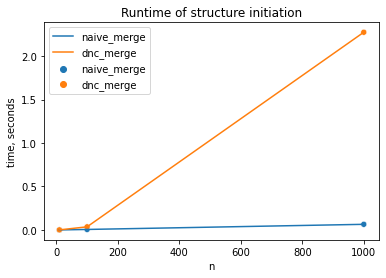

In [50]:
lineplt = sns.lineplot(x=sizes, y=vals, hue=experiments)
lineplt.set(title = 'merge comparison runtime',xlabel='n', ylabel='time, seconds')

sns.scatterplot(x=sizes, y=vals, hue=experiments)




##g.
 compare the runtime of the two approaches, while the total number $N=\Sigma n1,n2...,n_k$ goes up to $10^5$ and $k=10$ is fixed. 

 Plot and make conclusions

Conclusion:
  as we can see , the divide and conquer algo works much slower at bigger inputs , i think that this is because all the callbacks , which each takes t(time) and is multiplied each recursion.
  therfore , the naive merge is faster .

#h.
write a helper function that calls the best sort solution from the presorting step, optimized for $k>log(N), N>>100$




In [55]:
#helper function
def give_presorted_sublist_optimal(mysize=100):
  lst1 = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=mysize)) if x < 101 and x>= 0]
  count_sort(lst1)
  return lst1

In [58]:
lill = give_presorted_sublist_optimal(100)
print(lill)

[52, 54, 54, 57, 57, 58, 59, 61, 61, 62, 62, 63, 65, 65, 66, 67, 67, 68, 68, 69, 70, 70, 71, 73, 74, 74, 74, 75, 75, 75, 75, 75, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 78, 79, 80, 80, 80, 80, 81, 82, 82, 83, 83, 83, 83, 84, 84, 84, 85, 85, 85, 86, 86, 86, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 90, 90, 91, 91, 92, 92, 92, 94, 94, 96, 97, 99, 100]


use this function, combined with the merge algorithm of your choice.  Show the prformance of your best solution for differnt $N$ (up to at least 10^5), 3 different $k$'s (be sure to take values smaller and larger than $log(N)$ to be tested)

best solution will gain 10 poits bonus. You may use any data structure form any library that was covered at the lessons, but the sorting must be your own.

In [59]:
def my_try(listoflists):
  for i in range(len(listoflists)):
    count_sort(listoflists[i])
  return naive_merge(listoflists)  

In [75]:
t6=[]

for i in range(9):
  for k in range(1,4): 
  #print(k)
  
    lst10 = prep_lst_of_lsts(pow(10,k),k)
    #print(lst1)
    lst11 = lst7.copy()
    
    
    t6.append(timeit.timeit( lambda:my_try(lst11) ,number=10))
    




In [73]:
print(experiments)
print(sizes)
print(vals)

['myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest'
 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest'
 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest'
 'myBest' 'myBest' 'myBest' 'myBest' 'myBest' 'myBest']
[  10  100 1000   10  100 1000   10  100 1000   10  100 1000   10  100
 1000   10  100 1000   10  100 1000   10  100 1000   10  100 1000   10
  100 1000]
[0.18714324 0.15232959 0.07651991 0.07748665 0.08628162 0.06600083
 0.05649464 0.043881   0.047869   0.04577573 0.04272868 0.04625812
 0.04905561 0.04291668 0.04428044 0.0418414  0.05034264 0.04209692
 0.04475059 0.04723053 0.04148201 0.04261054 0.04453791 0.04377656
 0.04301472 0.05163999 0.04313519]


<AxesSubplot:title={'center':'my sort and merge runtime'}, xlabel='n', ylabel='time, seconds'>

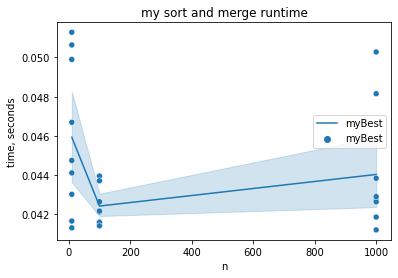

In [76]:
sizes = flat_to_array([[pow(10,i)]*1 for i in range(1,4)]*9)
experiments = flat_to_array([['myBest'] * 3 * 9 ])
vals = np.asarray(t6)

lineplt = sns.lineplot(x=sizes, y=vals, hue=experiments)
lineplt.set(title = 'my sort and merge runtime',xlabel='n', ylabel='time, seconds')

sns.scatterplot(x=sizes, y=vals, hue=experiments)


#Q2.
a. Using min/max heap/s, implement a data structure that serves as a med-heap, which always returns the median element at $O(1)$ and can be updated (while removing the optimal element or while adding a new element) **at** $O(\log n)$

In [51]:
#possible implementation of a heap functions:
"""
Min Heap Implementation in Python
"""
class MinHeap:
    def __init__(self):
        """
        On this implementation the heap list is initialized with a value
        """
        self.heap_list = [0]
        self.current_size = 0
 
    def sift_up(self, i):
        """
        Moves the value up in the tree to maintain the heap property.
        """
        # While the element is not the root or the left element
        Stop = False
        while (i // 2 > 0) and Stop == False:
            # If the element is less than its parent swap the elements
            if self.heap_list[i] < self.heap_list[i // 2]:
                self.heap_list[i], self.heap_list[i // 2] = self.heap_list[i // 2], self.heap_list[i]
            else:
                Stop = True
            # Move the index to the parent to keep the properties
            i = i // 2
 
    def insert(self, k):
        """
        Inserts a value into the heap
        """
        # Append the element to the heap
        self.heap_list.append(k)
        # Increase the size of the heap.
        self.current_size += 1
        # Move the element to its position from bottom to the top
        self.sift_up(self.current_size)
 
    def sift_down(self, i):
        # if the current node has at least one child
        while (i * 2) <= self.current_size:
            # Get the index of the min child of the current node
            mc = self.min_child(i)
            # Swap the values of the current element is greater than its min child
            if self.heap_list[i] > self.heap_list[mc]:
                self.heap_list[i], self.heap_list[mc] = self.heap_list[mc], self.heap_list[i]
            i = mc
 
    def min_child(self, i):
        # If the current node has only one child, return the index of the unique child
        if (i * 2)+1 > self.current_size:
            return i * 2
        else:
            # Herein the current node has two children
            # Return the index of the min child according to their values
            if self.heap_list[i*2] < self.heap_list[(i*2)+1]:
                return i * 2
            else:
                return (i * 2) + 1
 
    def delete_min(self):
        # Equal to 1 since the heap list was initialized with a value
        if len(self.heap_list) == 1:
            return 'Empty heap'
 
        # Get root of the heap (The min value of the heap)
        root = self.heap_list[1]
 
        # Move the last value of the heap to the root
        self.heap_list[1] = self.heap_list[self.current_size]
 
        # Pop the last value since a copy was set on the root
        *self.heap_list, _ = self.heap_list
 
        # Decrease the size of the heap
        self.current_size -= 1
 
        # Move down the root (value at index 1) to keep the heap property
        self.sift_down(1)
 
        # Return the min value of the heap
        return root
    
    def peek(self):
        if len(self.heap_list) == 1:
            return 'Empty heap'
 
        # Get root of the heap (The min value of the heap)
        root = self.heap_list[1]
        return int(root)



 

In [41]:
"""
Driver program
"""
# Same tree as above example.
my_heap = MinHeap()
print(my_heap)
my_heap.insert(5)
print(my_heap)
my_heap.insert(6)
print(my_heap)
my_heap.insert(7)
my_heap.insert(9)
my_heap.insert(13)
my_heap.insert(11)
my_heap.insert(10)

print(my_heap.delete_min()) # removing min node i.e 5 

5


you may adopt any of the heap implementations, or use your own. your goal is, by calling the underlying one or more heaps - implement the med-heap as a class 

In [70]:
class MedHeap:
    def __init__(self):
      self.bigger = MinHeap()
      self.smaller = MinHeap()
      self.bigSize = 0
      self.smalSize = 0

    def insert(self,k):
      #case empty
      if (self.bigSize == 0 and self.smalSize == 0):
        self.bigger.insert(int(k))
        self.bigSize+=1
      else:
        #not empty
        if (self.bigSize - self.smalSize ==0):
          #we are balanced and want to insert another
          if (k<= self.bigger.peek()):
            self.smaller.insert(int(-1*k))
            self.smalSize+=1
            #now were not balanced 
            self.bigger.insert(int(-1* self.smaller.delete_min()))
            self.bigSize+=1
            self.smalSize-=1
          else:
            self.bigger.insert(int(k))
            self.bigSize+=1
        else:
          #not balanced
          if (k<= self.bigger.peek()):
            self.smaller.insert(int(-1* k))
            self.smalSize+=1
          else:
            self.bigger.insert(int(k))
            self.bigSize+=1
            self.smaller.insert(int(-1* self.bigger.delete_min()))
            self.bigSize-=1
            self.smalSize+=1
    
    def delete_med(self):
      if (self.bigSize ==0 and self.smalSize ==0):
        return
      else:
        if (self.bigSize - self.smalSize ==0):
          #were balanced so auto take from bigger and rebalance
           
          self.bigger.insert(int(-1* self.smaller.delete_min()))
          self.bigSize+=1
          self.smalSize-=1
          self.bigSize-=1
          return self.bigger.delete_min()
          #and were +1 for the biggs
        else:
          #were unbalanced
          #print(self.bigger.current_size)
          self.bigSize-=1
          return self.bigger.delete_min()








In [71]:
my_heap = MedHeap()
print(my_heap.bigger.current_size)
print(my_heap.smaller.current_size)
my_heap.insert(6)
print(my_heap.bigger.current_size)
print(my_heap.smaller.current_size)
my_heap.insert(7)
print(my_heap.bigger.current_size)
print(my_heap.smaller.current_size)
my_heap.insert(9)
print(my_heap.bigger.current_size)
print(my_heap.smaller.current_size)
print(my_heap.delete_med())
print(my_heap.bigger.current_size)
print(my_heap.smaller.current_size)

0
0
1
0
1
1
2
1
7
1
1


In [72]:
my_heap = MedHeap()
my_heap.insert(5)
my_heap.insert(6)
my_heap.insert(7)
my_heap.insert(9)
my_heap.insert(13)
my_heap.insert(11)
my_heap.insert(10)
print(my_heap.delete_med())

9


##b.
use a heap/s from the **heapq** package.
check if this improves your performance. check a fair range of $N$'s to display

In [73]:
# Python3 program to demonstrate working of heapq

from heapq import heapify, heappush, heappop

# Creating empty heap
heap = []
heapify(heap)

# Adding items to the heap using heappush function
heappush(heap, 10)
heappush(heap, 30)
heappush(heap, 20)
heappush(heap, 400)

# printing the value of minimum element
print("Head value of heap : "+str(heap[0]))

# printing the elements of the heap
print("The heap elements : ")
for i in heap:
	print(i, end = ' ')
print("\n")




Head value of heap : 10
The heap elements : 
10 30 20 400 



In [74]:
element = heappop(heap)

# printing the elements of the heap
print("The heap elements : ")
for i in heap:
	print(i, end = ' ')

The heap elements : 
20 30 400 

In [114]:
class MedHeapFromHeapq:
    def __init__(self):
      self.bigger = []
      self.smaller = []
      self.bigSize = 0
      self.smalSize = 0

    def insert(self,k):
      #case empty
      if (self.bigSize == 0 and self.smalSize == 0):
        heappush(self.bigger, int(k))
        self.bigSize+=1
      else:
        #not empty
        if (self.bigSize - self.smalSize ==0):
          #we are balanced and want to insert another
          if (k<= int(self.bigger[0])):
            heappush(self.smaller ,(-1*int(k)))
            self.smalSize+=1
            #now were not balanced 
            heappush(self.bigger ,(-1*int( (heappop(self.smaller)))))
            self.bigSize+=1
            self.smalSize-=1
          else:
            heappush(self.bigger ,(int(k)))
            self.bigSize+=1
        else:
          #not balanced
          if (k<= int(self.bigger[0])):
            heappush(self.smaller,(-1*int( k)))
            self.smalSize+=1
          else:
            heappush(self.bigger, (int(k)))
            self.bigSize+=1
            heappush(self.smaller, (-1*int( (heappop(self.bigger)))))
            self.bigSize-=1
            self.smalSize+=1
    
    def delete_med(self):
      if (self.bigSize ==0 and self.smalSize ==0):
        return
      else:
        if (self.bigSize - self.smalSize ==0):
          #were balanced so auto take from bigger and rebalance
           
          heappush(self.bigger ,(-1*int( heappop(self.smaller))))
          self.bigSize+=1
          self.smalSize-=1
          self.bigSize-=1
          return heappop(self.bigger)
          #and were +1 for the biggs
        else:
          #were unbalanced
          #print(self.bigger.current_size)
          self.bigSize-=1
          return heappop(self.bigger)



In [110]:
my_heap = MedHeapFromHeapq()
my_heap.insert(5)
my_heap.insert(6)
my_heap.insert(7)
my_heap.insert(9)
my_heap.insert(13)
my_heap.insert(11)
my_heap.insert(10)
print(my_heap.delete_med())

9


In [111]:
def task1(lst ):
  heap = MedHeapFromHeapq()
  for i in lst:
    heap.insert(int(i))
  print(heap.delete_med()) 
  heap=[] 

In [112]:
def task2(lst ):
  heap = MedHeap()
  for i in lst:
    heap.insert(int(i))
  print(heap.delete_med()) 
  heap=[] 

In [164]:
import numpy as np
import timeit

def flat_to_array(lst1):
  return np.asarray([item for sublist in lst1 for item in sublist])
#comparison for range of n's (10 ,100, 1000)
my_med = MedHeap()
my_hpq = MedHeapFromHeapq()
tst1=[]
tst2=[]
n_sizes =[10,20,30,40,50,60,70,80,90,100 ]

for i in n_sizes:
  lst20 = [ int(x) for x in list(np.random.normal(loc=80, scale=15, size=10)) if x < 101 and x>= 0]
  tst1=tst1+ timeit.repeat(lambda:task1(lst20),repeat =5 , number =10)
  tst2=tst2+ timeit.repeat(lambda:task2(lst20),repeat =5, number =10)


86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
7

In [165]:
sizes = flat_to_array([[10*i]*5 for i in range(1,11)]*2)

experiments = flat_to_array([['mymedheap'] * 10 * 5 + ['medfromhpaq'] * 10 * 5 ])
vals = np.asarray(tst1 + tst2)

In [ ]:

def flat_to_array(lst1):
  return np.asarray([item for sublist in lst1 for item in sublist])

sizes = flat_to_array([[pow(2,i)]*rep for i in degrees]*2)
experiments = flat_to_array([['array.array'] * len(degrees) * rep + ['list'] * len(degrees) * rep])
vals = np.asarray(t1 + t2 )



In [166]:
print(len(sizes))
print(experiments)
print (vals)

100
['mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap' 'mymedheap'
 'mymedheap' 'mymedheap' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq'
 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq'
 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq'
 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq'
 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq'
 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'medfromhpaq' 'med

<AxesSubplot:title={'center':'merge comparison runtime'}, xlabel='n', ylabel='time, seconds'>

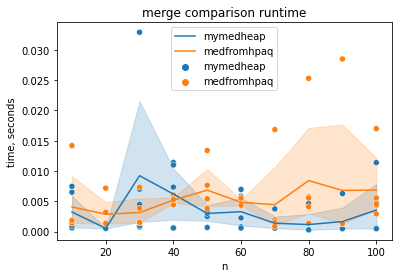

In [167]:
import seaborn as sns 
lineplt = sns.lineplot(x=sizes, y=vals, hue=experiments)
lineplt.set(title = 'merge comparison runtime',xlabel='n', ylabel='time, seconds')

sns.scatterplot(x=sizes, y=vals, hue=experiments)




Your performance comparance of two data structure implementations:



CONCLUSIONS:
as we can see the code snippet is faster again , might be because the heapaq is using too many callbacks to itself .
